In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
# Load dataset
data = pd.read_excel('/content/drive/My Drive/Supply Chain/online retail.xlsx')

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
for i in data.columns:
  print("Actual number of values",i,len(data[i]))
  print("Unique number of values",i,len(data[i].unique()))

Actual number of values InvoiceNo 1048575
Unique number of values InvoiceNo 52961
Actual number of values StockCode 1048575
Unique number of values StockCode 5304
Actual number of values Description 1048575
Unique number of values Description 5693
Actual number of values Quantity 1048575
Unique number of values Quantity 1048
Actual number of values InvoiceDate 1048575
Unique number of values InvoiceDate 47046
Actual number of values UnitPrice 1048575
Unique number of values UnitPrice 2784
Actual number of values CustomerID 1048575
Unique number of values CustomerID 5925
Actual number of values Country 1048575
Unique number of values Country 43


In [7]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,4372
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,236682
Country,0


In [8]:
data.dropna(inplace=True)
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [19]:
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng') # Added to download the required resource
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [28]:
sample_data = data.sample(n=50001, random_state=42).reset_index(drop=True)

In [29]:
colours = ['red','orange', 'yellow','green', 'blue', 'indigo','violet','purple','pink','silver', 'gold', 'beige', 'brown', 'grey', 'gray', 'black', 'white', 'cream']

In [30]:
stop_words = set(stopwords.words('english'))
Product_type = []
Colour_type = []

In [32]:
# Adding new columns in dataframe

sample_data['Product Type']=Product_type
sample_data['Colour_type']=Colour_type
sample_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Product Type,Colour_type
0,506442,21166,COOK WITH WINE METAL SIGN,2,2010-04-29 16:45:00,1.95,16520.0,United Kingdom,cook wine metal sign,no_color
1,572131,22231,JIGSAW TREE WITH BIRDHOUSE,12,2011-10-21 09:56:00,0.59,13917.0,United Kingdom,jigsaw tree birdhouse,no_color
2,549978,22460,EMBOSSED GLASS TEALIGHT HOLDER,12,2011-04-13 15:00:00,1.25,14834.0,United Kingdom,glass tealight holder,no_color
3,548313,22999,TRAVEL CARD WALLET RETRO PETALS,4,2011-03-30 12:15:00,0.42,15353.0,United Kingdom,travel card wallet retro petal,no_color
4,533904,22068,BLACK PIRATE TREASURE CHEST,2,2010-11-19 11:54:00,1.65,16936.0,United Kingdom,pirate treasure chest,black


In [33]:
X = sample_data.drop(["Description","InvoiceDate"],axis=1)
X.head()
X['Revenue'] = X['UnitPrice'] * X['Quantity']
X.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Product Type,Colour_type,Revenue
0,506442,21166,2,1.95,16520.0,United Kingdom,cook wine metal sign,no_color,3.90
1,572131,22231,12,0.59,13917.0,United Kingdom,jigsaw tree birdhouse,no_color,7.08
2,549978,22460,12,1.25,14834.0,United Kingdom,glass tealight holder,no_color,15.00
3,548313,22999,4,0.42,15353.0,United Kingdom,travel card wallet retro petal,no_color,1.68
4,533904,22068,2,1.65,16936.0,United Kingdom,pirate treasure chest,black,3.30


In [34]:
# Label encoding of categorical features

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [35]:
for col in ["InvoiceNo", "StockCode", "CustomerID", "Country", "Product Type", "Colour_type"]:
    X[col] = X[col].astype(str)  # Convert all values to string
    X[col] = label_encoder.fit_transform(X[col])


In [36]:
!pip install kmodes
# Changed the data type of attributes

X = X.astype('category')
X.iloc[:, 2] = X.iloc[:, 2].astype(float)
X.iloc[:, 3] = X.iloc[:, 3].astype(float)
X.iloc[:, 8] = X.iloc[:, 3].astype(float)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   InvoiceNo     50001 non-null  category
 1   StockCode     50001 non-null  category
 2   Quantity      50001 non-null  category
 3   UnitPrice     50001 non-null  category
 4   CustomerID    50001 non-null  category
 5   Country       50001 non-null  category
 6   Product Type  50001 non-null  category
 7   Colour_type   50001 non-null  category
 8   Revenue       50001 non-null  float64 
dtypes: category(8), float64(1)
memory usage: 2.2 MB


/tmp/ipython-input-1526465686.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        1.95
1        0.59
2        1.25
3        0.42
4        1.65
         ... 
49996    2.08
49997    3.75
49998    1.65
49999    2.55
50000    1.25
Name: UnitPrice, Length: 50001, dtype: float64' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  X.iloc[:, 8] = X.iloc[:, 3].astype(float)


In [37]:
# Train test split of new dataframe X

from sklearn.model_selection import train_test_split
train, test = train_test_split(X, train_size=0.8, random_state = 0)

In [38]:
# Checking the optimal values of 'K'

import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 706, ncost: 7274580.464339768
Run: 1, iteration: 2/100, moves: 212, ncost: 6046560.810753454
Run: 1, iteration: 3/100, moves: 44, ncost: 5086971.156814425
Run: 1, iteration: 4/100, moves: 20, ncost: 3896011.327720544
Run: 1, iteration: 5/100, moves: 4, ncost: 3377126.293981262
Run: 1, iteration: 6/100, moves: 2, ncost: 3168722.0510744685
Run: 1, iteration: 7/100, moves: 0, ncost: 3168722.0510744685
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 8393238.832813585
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 8393238.832813585
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 25, ncost: 4776027.758433554
Run: 4, iteration: 2/100, moves: 12, ncost: 3896011.327720544

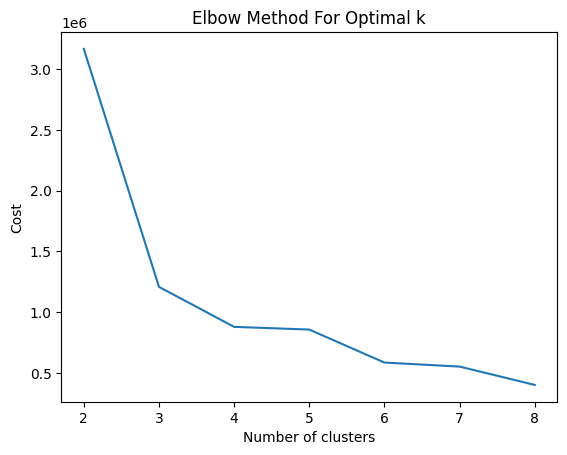

In [39]:
train_sample = train.sample(n=2000, random_state=42)
train_sample.dropna(inplace=True)
train_sample = train_sample.drop_duplicates()

for col in ['InvoiceNo', 'StockCode', 'CustomerID', 'Country', 'Product Type', 'Colour_type']:
    train_sample[col] = train_sample[col].astype('category')

cost = []
for num_clusters in range(2, 9):  # testing from 2 to 8 clusters
    kproto = KPrototypes(n_clusters=num_clusters, init='random', verbose=1)
    labels = kproto.fit_predict(train_sample, categorical=[0,1,4,5,6,7])
    cost.append(kproto.cost_)

plt.plot(range(2, 9), cost)
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()


In [40]:
kproto = KPrototypes(n_clusters=5, init='Cao')
kproto.fit_predict(train, categorical=[0,1,4,5,6])
print(kproto.cost_)
labels=kproto.labels_

57088325.24990135


In [41]:
# Adding new attribute

train["Cluster number"]=labels

In [42]:
X.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'CustomerID',
       'Country', 'Product Type', 'Colour_type', 'Revenue'],
      dtype='object')

In [43]:
# Now added "InvoiceDate" in the dataframe

mergedDf = train.merge(pd.DataFrame(data["InvoiceDate"]), left_index=True, right_index=True)
mergedDf

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Product Type,Colour_type,Revenue,Cluster number,InvoiceDate
38608,8945,964,8,1.45,3623,36,1875,7,1.45,2,2009-12-17 15:41:00
21813,5671,834,4,1.25,1339,36,968,1,1.25,2,2009-12-09 14:48:00
28448,3577,2610,12,1.49,649,36,382,7,1.49,2,2009-12-14 12:24:00
32148,9125,2502,4,5.45,4506,36,985,7,5.45,2,2009-12-15 09:40:00
25373,1078,1245,8,3.39,4503,36,1446,3,3.39,2,2009-12-11 12:45:00
...,...,...,...,...,...,...,...,...,...,...,...
20757,18499,1764,2,3.75,2440,36,1124,7,3.75,2,2009-12-09 10:02:00
41993,6750,190,5,1.65,2621,36,1788,11,1.65,2,2009-12-21 09:00:00
21243,14805,904,24,1.25,236,13,2631,11,1.25,2,2009-12-09 13:22:00
45891,9123,1791,3,9.95,796,36,3028,7,9.95,2,2010-01-04 17:39:00


In [44]:
#Feature engineering of "InvoiceDate" column
from datetime import datetime

In [45]:
mergedDf['Year'] = mergedDf['InvoiceDate'].dt.year
mergedDf['Month'] = mergedDf['InvoiceDate'].dt.month
mergedDf['Day'] = mergedDf['InvoiceDate'].dt.day
mergedDf['DayOfWeek'] = mergedDf['InvoiceDate'].dt.dayofweek.astype(str)

mergedDf.drop(['InvoiceDate'], axis=1, inplace=True)
mergedDf.head()

mergedDf.to_csv('/content/drive/My Drive/Supply Chain/merfedDf.csv')
mergedDf = pd.read_csv('/content/drive/My Drive/Supply Chain/merfedDf.csv')
mergedDf.drop(['Unnamed: 0'], axis=1, inplace=True)
mergedDf.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Product Type,Colour_type,Revenue,Cluster number,Year,Month,Day,DayOfWeek
0,8945,964,8,1.45,3623,36,1875,7,1.45,2,2009,12,17,3
1,5671,834,4,1.25,1339,36,968,1,1.25,2,2009,12,9,2
2,3577,2610,12,1.49,649,36,382,7,1.49,2,2009,12,14,0
3,9125,2502,4,5.45,4506,36,985,7,5.45,2,2009,12,15,1
4,1078,1245,8,3.39,4503,36,1446,3,3.39,2,2009,12,11,4


In [46]:
# Splitting of merdedDF dataframe into traina nd validation

from sklearn.model_selection import train_test_split
train_, val_= train_test_split(mergedDf, train_size = 0.8, random_state = 0)
train_y=train_["Cluster number"]
train_x=train_.drop(['Cluster number'],axis=1,inplace=False)

In [47]:
val_y=val_["Cluster number"]
val_x=val_.drop(['Cluster number'],axis=1,inplace=False)

In [48]:
#Linear SVC is used. and it is giving best result among other machine leaning algorithms.
from sklearn.svm import LinearSVC
model1 = LinearSVC()
model1.fit(train_x,train_y)

LinearSVC()

In [49]:
# validating on test data

pred_y = model1.predict(val_x)

In [50]:
# Preformance evaluation
from sklearn.metrics import accuracy_score
accuracy_score(val_y,pred_y)

0.9996542783059637

In [51]:
# Adding "InvoiceDate" in test data

test_Df = test.merge(pd.DataFrame(data["InvoiceDate"]), left_index=True, right_index=True)
test_Df

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Product Type,Colour_type,Revenue,InvoiceDate
14283,11801,1386,24,0.21,556,36,2179,9,0.21,2009-12-06 15:51:00
7552,4793,3324,12,0.85,1786,36,724,7,0.85,2009-12-03 13:22:00
39339,13693,1495,1,6.75,4496,36,91,7,6.75,2009-12-18 10:24:00
25653,6216,1608,6,2.55,3804,36,473,7,2.55,2009-12-11 14:20:00
21049,8351,1608,12,2.55,940,36,473,7,2.55,2009-12-09 12:32:00
...,...,...,...,...,...,...,...,...,...,...
28642,12772,1172,3,4.95,3479,36,608,7,4.95,2009-12-14 13:06:00
39080,5889,624,24,0.85,4391,36,1627,7,0.85,2009-12-17 18:20:00
49547,14692,1244,4,3.95,3856,36,1446,0,3.95,2010-01-10 15:24:00
46482,20324,1318,6,2.95,2640,36,1117,7,2.95,2010-01-05 13:58:00


In [52]:
# Feature engineering of "InvoiceDate" column

from datetime import datetime

In [53]:
test_Df['Year'] = test_Df['InvoiceDate'].dt.year
test_Df['Month'] = test_Df['InvoiceDate'].dt.month
test_Df['Day'] = test_Df['InvoiceDate'].dt.day
test_Df['DayOfWeek'] = test_Df['InvoiceDate'].dt.dayofweek.astype(int)

test_Df.drop(['InvoiceDate'], axis=1, inplace=True)

test_Df.reset_index(drop=True, inplace=True)
test_Df.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Product Type,Colour_type,Revenue,Year,Month,Day,DayOfWeek
0,11801,1386,24,0.21,556,36,2179,9,0.21,2009,12,6,6
1,4793,3324,12,0.85,1786,36,724,7,0.85,2009,12,3,3
2,13693,1495,1,6.75,4496,36,91,7,6.75,2009,12,18,4
3,6216,1608,6,2.55,3804,36,473,7,2.55,2009,12,11,4
4,8351,1608,12,2.55,940,36,473,7,2.55,2009,12,9,2


In [54]:
test_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   InvoiceNo     7182 non-null   category
 1   StockCode     7182 non-null   category
 2   Quantity      7182 non-null   category
 3   UnitPrice     7182 non-null   category
 4   CustomerID    7182 non-null   category
 5   Country       7182 non-null   category
 6   Product Type  7182 non-null   category
 7   Colour_type   7182 non-null   category
 8   Revenue       7182 non-null   float64 
 9   Year          7182 non-null   int32   
 10  Month         7182 non-null   int32   
 11  Day           7182 non-null   int32   
 12  DayOfWeek     7182 non-null   int64   
dtypes: category(8), float64(1), int32(3), int64(1)
memory usage: 1.4 MB


In [55]:
from sklearn.preprocessing import OrdinalEncoder

for col in ["InvoiceNo", "StockCode", "CustomerID", "Country", "Product Type", "Colour_type"]:
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    # Fit on train data reshaped to 2D array
    train_x[[col]] = oe.fit_transform(train_x[[col]].astype(str))
    test_Df[[col]] = oe.transform(test_Df[[col]].astype(str))


In [56]:
test_features = test_Df[train_x.columns]
for col in ["InvoiceNo", "StockCode", "CustomerID", "Country", "Product Type", "Colour_type", "DayOfWeek"]:
    test_features[col] = test_features[col].astype(float)
test_Df['Cluster number'] = model1.predict(test_features)

In [57]:
train_y=train_["Quantity"].astype('int')
train_x=train_.drop(['Quantity'], axis=1,inplace=False)

In [58]:
test_Df_y=test_Df["Quantity"].astype('int')
test_Df_x=test_Df.drop(['Quantity'],axis=1,inplace=False)

In [59]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(bootstrap=True,ccp_alpha=0.0,
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None,)
clf.fit(train_x, train_y)
# Select only columns that are in train_x for prediction
prediction_test = clf.predict(test_Df_x[train_x.columns])
prediction_test

array([24, 12,  2, ...,  4,  6,  3])

In [60]:
from sklearn.metrics import f1_score
f1_score(test_Df_y, prediction_test, average='micro')
accuracy_score(test_Df_y, prediction_test)

0.2425508214981899

In [74]:
# Start Hyperparameter tuning of RAndom forest algorithm

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [75]:
from pprint import pprint
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [76]:
# Define parameter grid (smaller grid for GridSearch due to combinatorial explosion)
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [8, 32],
    'min_samples_split': [2, 8],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt']
}

In [77]:
# Create base model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with 2-fold CV and parallel jobs
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=2,
    verbose=2,
    n_jobs=2
)

# Fit GridSearchCV on training data
grid_search.fit(train_x, train_y)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42), n_jobs=2,
             param_grid={'max_depth': [8, 32], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 8],
                         'n_estimators': [100, 300, 500]},
             verbose=2)

In [78]:
# Print best hyperparameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 32, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Score: 0.4112126497443461


In [79]:
# Use best estimator for prediction (optional)
best_rf = grid_search.best_estimator_
rf_predictions = best_rf.predict(test_Df_x)


In [80]:
# Now for KNN part (unchanged from your structure):

# Scale features for KNN
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_Df_x)

In [81]:
# Train KNN
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_x_scaled, train_y)

# Predict with KNN on scaled test data
knn_pred = neigh.predict(test_x_scaled)

In [82]:
# Print accuracy for KNN
print("KNN Accuracy:", accuracy_score(test_Df_y, knn_pred))

KNN Accuracy: 0.14327485380116958


In [84]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier(n_estimators=100, random_state=0)
ad.fit(train_x, train_y)
adb=ad.predict(test_Df_x)
print(accuracy_score(test_Df_y, adb))

0.11793372319688109


In [86]:
# logistic

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Scale features (strongly recommended for logistic regression)
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_Df_x)

# Use OneVsRestClassifier with LogisticRegression (default multi_class='auto')
lr = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))
lr.fit(train_x_scaled, train_y)

lrc_pred = lr.predict(test_x_scaled)
print("Logistic Regression Accuracy:", accuracy_score(test_Df_y, lrc_pred))

Logistic Regression Accuracy: 0.2011974380395433


In [87]:
# Naive base Classifier

from sklearn.naive_bayes import GaussianNB

lr = GaussianNB()
lr.fit(train_x, train_y)
lrc=lr.predict(test_Df_x)
print(accuracy_score(test_Df_y, lrc))

0.18699526594263435


In [89]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dtree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dtree, param_grid, cv=3, n_jobs=2, verbose=2)
grid_search.fit(train_x, train_y)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

best_dtree = grid_search.best_estimator_
dtree_predictions = best_dtree.predict(test_Df_x)
print("Test Accuracy:", accuracy_score(test_Df_y, dtree_predictions))


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best CV Score: 0.3342410096818811
Test Accuracy: 0.1881091617933723


In [91]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(train_x, train_y)
gbc_pred = gb.predict(test_Df_x)  # Predict using the GradientBoostingClassifier

print("Gradient Boosting Accuracy:", accuracy_score(test_Df_y, gbc_pred))

Gradient Boosting Accuracy: 0.15636313004734056
